# Describe the data within the dataset.

Our dataset has 13 columns. Categorical variables are the columns 'GoingTo', 'DayOfWeek', 'Date', 'Take407All', and 'Comments', and every column is nominal excepts the ordinal 'Date' column. Numerical variables are the columns 'StartTime', 'Distance', 'MaxSpeed', 'AvgSpeed', FuelEconomy', 'TotalTime', and 'MovingTime', and these columns are all continuous variables.

Our dataset contains 205 entries and the 'FuelEconomy' contains 17 missing values, so we'll handle these missing values first. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("travel-times.csv")
df

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,7/18/2011,08:09,Monday,GSK,54.52,125.6,49.9,82.4,7.89,65.5,39.7,No,NaN
201,7/14/2011,08:03,Thursday,GSK,50.90,123.7,76.2,95.1,7.89,40.1,32.1,Yes,NaN
202,7/13/2011,17:08,Wednesday,Home,51.96,132.6,57.5,76.7,NaN,54.2,40.6,Yes,NaN
203,7/12/2011,17:51,Tuesday,Home,53.28,125.8,61.6,87.6,NaN,51.9,36.5,Yes,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     188 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
 12  Comments        24 non-null     object 
dtypes: float64(6), object(7)
memory usage: 20.9+ KB


# Identify and handle missing values

We can see that the Fuel Economy column has missing values. We'll try to impute them by using ML models. First, we'll convert all columns into numerical columns.

In [4]:
df['FuelEconomy'].unique()

array([nan, '-', '8.89', '9.08', '9.76', '9.16', '9.3', '10.05', '9.53',
       '9.35', '8.32', '8.97', '8.75', '7.81', '7.97', '8.93', '8.31',
       '8.33', '8.5', '8.54', '8.37', '8.48', '8.45', '8.28', '7.89'],
      dtype=object)

In [5]:
df[df['FuelEconomy'] == '-']

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
6,1/2/2012,17:31,Monday,Home,51.37,123.2,82.9,87.3,-,37.2,35.3,No,NaN
7,1/2/2012,07:34,Monday,GSK,49.01,128.3,77.5,85.9,-,37.9,34.3,No,NaN


Here, we convert the '-' entries in the 'FuelEconomy' column into NaN values for uniformity.

In [6]:
df[df['FuelEconomy'] == '-']
df['FuelEconomy'] = df['FuelEconomy'].replace('-', None)
df['FuelEconomy'] = df['FuelEconomy'].astype(float)

In [7]:
df['FuelEconomy'].unique()

array([  nan,  8.89,  9.08,  9.76,  9.16,  9.3 , 10.05,  9.53,  9.35,
        8.32,  8.97,  8.75,  7.81,  7.97,  8.93,  8.31,  8.33,  8.5 ,
        8.54,  8.37,  8.48,  8.45,  8.28,  7.89])

Here, we concatenate the date and time columns into a single column to convert it into unix date so that we can easily transform it into numerical data.  

In [8]:
df['Date'] = pd.to_datetime(df['Date'] + ' ' + df['StartTime'])
df = df.drop('StartTime', axis=1)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%m:%s')
df['Date'] = df['Date'].apply(lambda x: x.timestamp())

We also convert the 'Take407All' column into numerical column.

In [9]:
df['Take407All'] = df['Take407All'].replace({'Yes': 1, 'No': 0})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    float64
 1   DayOfWeek       205 non-null    object 
 2   GoingTo         205 non-null    object 
 3   Distance        205 non-null    float64
 4   MaxSpeed        205 non-null    float64
 5   AvgSpeed        205 non-null    float64
 6   AvgMovingSpeed  205 non-null    float64
 7   FuelEconomy     186 non-null    float64
 8   TotalTime       205 non-null    float64
 9   MovingTime      205 non-null    float64
 10  Take407All      205 non-null    int64  
 11  Comments        24 non-null     object 
dtypes: float64(8), int64(1), object(3)
memory usage: 19.3+ KB


For the other object columns, we change first change them into category columns, and then use dummy variables for better performance in ML models.

In [11]:
df.DayOfWeek = df.DayOfWeek.astype('category')
df.GoingTo = df.GoingTo.astype('category')
df.Comments = df.Comments.astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Date            205 non-null    float64 
 1   DayOfWeek       205 non-null    category
 2   GoingTo         205 non-null    category
 3   Distance        205 non-null    float64 
 4   MaxSpeed        205 non-null    float64 
 5   AvgSpeed        205 non-null    float64 
 6   AvgMovingSpeed  205 non-null    float64 
 7   FuelEconomy     186 non-null    float64 
 8   TotalTime       205 non-null    float64 
 9   MovingTime      205 non-null    float64 
 10  Take407All      205 non-null    int64   
 11  Comments        24 non-null     category
dtypes: category(3), float64(8), int64(1)
memory usage: 16.2 KB


In [12]:
df_encoded = pd.get_dummies(df, columns=['DayOfWeek','GoingTo', 'Comments'], prefix=['Day', 'Going to', 'Comments'])
df_encoded

,Date,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Day_Friday,...,Comments_New tires,Comments_Police slowdown on 403,Comments_Pumped tires up: check fuel economy improved?,Comments_Put snow tires on,"Comments_Rain, rain, rain",Comments_Raining,Comments_Rainy,Comments_Start early to run a batch,Comments_Took 407 all the way (to McMaster),Comments_Turn around on Derry
0,1.325868e+09,51.29,127.4,78.3,84.8,NaN,39.3,36.3,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.325838e+09,51.63,130.3,81.8,88.9,NaN,37.9,34.9,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.325694e+09,51.27,127.4,82.0,85.8,NaN,37.5,35.9,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.325664e+09,49.17,132.3,74.2,82.9,NaN,39.8,35.6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.325617e+09,51.15,136.2,83.4,88.1,NaN,36.8,34.8,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.310977e+09,54.52,125.6,49.9,82.4,7.89,65.5,39.7,0,0,...,0,0,0,0,0,0,0,0,0,0
201,1.310631e+09,50.90,123.7,76.2,95.1,7.89,40.1,32.1,1,0,...,0,0,0,0,0,0,0,0,0,0
202,1.310577e+09,51.96,132.6,57.5,76.7,NaN,54.2,40.6,1,0,...,0,0,0,0,0,0,0,0,0,0
203,1.310493e+09,53.28,125.8,61.6,87.6,NaN,51.9,36.5,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 38 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Date                                                     205 non-null    float64
 1   Distance                                                 205 non-null    float64
 2   MaxSpeed                                                 205 non-null    float64
 3   AvgSpeed                                                 205 non-null    float64
 4   AvgMovingSpeed                                           205 non-null    float64
 5   FuelEconomy                                              186 non-null    float64
 6   TotalTime                                                205 non-null    float64
 7   MovingTime                                               205 non-null    float64
 8   Take407All                    

Then in order to use ML to handle our missing values, we split the dataset into target and feature variables.

In [14]:
columns = [c for c in df_encoded.columns if c != 'FuelEconomy']
columns

['Date',
 'Distance',
 'MaxSpeed',
 'AvgSpeed',
 'AvgMovingSpeed',
 'TotalTime',
 'MovingTime',
 'Take407All',
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Going to_GSK',
 'Going to_Home',
 'Comments_Accident at 403/highway 6; detour along Dundas',
 'Comments_Accident blocked 407 exit',
 'Comments_Accident: backup from Hamilton to 407 ramp',
 'Comments_Back to school traffic?',
 'Comments_Backed up at Bronte',
 'Comments_Detour taken',
 'Comments_Empty roads',
 'Comments_Heavy rain',
 'Comments_Heavy volume on Derry',
 'Comments_Huge traffic backup',
 'Comments_Medium amount of rain',
 'Comments_Must be Friday',
 'Comments_New tires',
 'Comments_Police slowdown on 403',
 'Comments_Pumped tires up: check fuel economy improved?',
 'Comments_Put snow tires on',
 'Comments_Rain, rain, rain',
 'Comments_Raining',
 'Comments_Rainy',
 'Comments_Start early to run a batch',
 'Comments_Took 407 all the way (to McMaster)',
 'Comments_Turn around on Derry']

In [15]:
X = df_encoded[df_encoded.FuelEconomy.notnull()].loc[:,columns]
X

,Date,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime,Take407All,Day_Friday,Day_Monday,...,Comments_New tires,Comments_Police slowdown on 403,Comments_Pumped tires up: check fuel economy improved?,Comments_Put snow tires on,"Comments_Rain, rain, rain",Comments_Raining,Comments_Rainy,Comments_Start early to run a batch,Comments_Took 407 all the way (to McMaster),Comments_Turn around on Derry
8,1.324627e+09,52.91,130.3,80.9,88.3,39.3,36.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1.324574e+09,51.17,122.3,70.6,78.1,43.5,39.3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1.324542e+09,49.15,129.4,74.0,81.4,39.8,36.2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1.324454e+09,51.77,124.8,71.7,78.9,43.3,39.4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1.324397e+09,51.45,130.1,75.2,82.7,41.1,37.3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1.311150e+09,48.50,125.8,75.7,87.3,38.5,33.3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
198,1.311096e+09,51.16,126.7,92.2,102.6,33.3,29.9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
199,1.311063e+09,50.96,124.3,82.3,96.4,37.2,31.7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
200,1.310977e+09,54.52,125.6,49.9,82.4,65.5,39.7,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y = df_encoded[df_encoded.FuelEconomy.notnull()]['FuelEconomy']
y

8      8.89
9      8.89
10     8.89
11     8.89
12     8.89
       ... 
197    7.89
198    7.89
199    7.89
200    7.89
201    7.89
Name: FuelEconomy, Length: 186, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.70)

We use Random forest regression to predict our missing values.

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
clf = RandomForestRegressor(n_estimators=100)

In [21]:
clf.fit(x_train, y_train)

RandomForestRegressor()

In [22]:
y_pred = clf.predict(x_test)

In [23]:
y_pred

array([8.2149, 8.4808, 8.2836, 8.6641, 9.0734, 8.2145, 9.4914, 9.2645,
       8.3811, 8.4018, 9.4652, 9.769 , 8.689 , 8.0728, 9.5964, 8.4435,
       9.1015, 8.4721, 8.4941, 8.43  , 8.4341, 8.4347, 8.2124, 8.431 ,
       8.4142, 8.432 , 8.5472, 9.0734, 8.4484, 8.8057, 8.8526, 8.4085,
       8.3021, 8.9892, 8.3607, 9.3213, 8.4165, 8.368 , 8.4367, 8.4237,
       8.2514, 9.4382, 8.4503, 9.5984, 9.4399, 8.2291, 9.2744, 8.4111,
       8.5484, 8.5755, 8.2631, 8.437 , 8.3086, 8.1812, 8.5217, 8.1417,
       8.8007, 8.4278, 8.4807, 8.4604, 9.4848, 8.4547, 8.1267, 9.4106,
       8.5294, 8.449 , 8.2586, 8.9952, 9.0816, 8.4327, 8.4345, 8.4361,
       8.5027, 8.6154, 8.1326, 8.3818, 9.4252, 9.2565, 8.4251, 8.435 ,
       8.4157, 8.4675, 9.3108, 8.4422, 8.0689, 8.3941, 8.4754, 8.1266,
       8.6579, 8.9794, 8.7509, 8.6586, 8.621 , 8.2281, 8.3698, 8.3808,
       8.2024, 8.4465, 9.399 , 9.3121, 8.4911, 8.4334, 9.4353, 8.2296,
       8.6544, 8.3842, 8.1107, 9.0986, 8.3043, 8.3231, 8.4119, 9.8206,
      

In [24]:
len(y_test)

131

We check the accuracy of our model using 2 different metrics.

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
print(f'Model accuracy = {r2_score(y_test,y_pred)}')

Model accuracy = 0.7740336323373076


In [27]:
print(f'Model accuracy = {mean_squared_error(y_test,y_pred)}')

Model accuracy = 0.05861089862595406


In [28]:
x_missing = df_encoded[df_encoded.FuelEconomy.isnull()].loc[:,columns]
x_missing

,Date,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime,Take407All,Day_Friday,Day_Monday,...,Comments_New tires,Comments_Police slowdown on 403,Comments_Pumped tires up: check fuel economy improved?,Comments_Put snow tires on,"Comments_Rain, rain, rain",Comments_Raining,Comments_Rainy,Comments_Start early to run a batch,Comments_Took 407 all the way (to McMaster),Comments_Turn around on Derry
0,1.325868e+09,51.29,127.4,78.3,84.8,39.3,36.3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.325838e+09,51.63,130.3,81.8,88.9,37.9,34.9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.325694e+09,51.27,127.4,82.0,85.8,37.5,35.9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.325664e+09,49.17,132.3,74.2,82.9,39.8,35.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.325617e+09,51.15,136.2,83.4,88.1,36.8,34.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.325577e+09,51.80,135.8,84.5,88.8,36.8,35.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1.325525e+09,51.37,123.2,82.9,87.3,37.2,35.3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1.325490e+09,49.01,128.3,77.5,85.9,37.9,34.3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
34,1.322756e+09,51.55,129.6,74.2,83.7,41.7,36.9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,1.322724e+09,51.38,124.6,80.1,84.4,38.5,36.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y_missing = clf.predict(x_missing)

In [30]:
y_missing

array([8.9698, 8.9923, 8.9797, 8.9938, 8.9731, 8.963 , 8.9566, 8.9987,
       9.3296, 9.2802, 9.3804, 9.3663, 9.3721, 9.7128, 9.4123, 9.4022,
       8.1662, 8.1558, 8.1996])

In [31]:
df_encoded_bk = df_encoded.copy()

In [32]:
x_missing['FuelEconomy'] = y_missing.astype(float)

In [33]:
x_missing

,Date,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime,Take407All,Day_Friday,Day_Monday,...,Comments_Police slowdown on 403,Comments_Pumped tires up: check fuel economy improved?,Comments_Put snow tires on,"Comments_Rain, rain, rain",Comments_Raining,Comments_Rainy,Comments_Start early to run a batch,Comments_Took 407 all the way (to McMaster),Comments_Turn around on Derry,FuelEconomy
0,1.325868e+09,51.29,127.4,78.3,84.8,39.3,36.3,0,1,0,...,0,0,0,0,0,0,0,0,0,8.9698
1,1.325838e+09,51.63,130.3,81.8,88.9,37.9,34.9,0,1,0,...,0,0,0,0,0,0,0,0,0,8.9923
2,1.325694e+09,51.27,127.4,82.0,85.8,37.5,35.9,0,0,0,...,0,0,0,0,0,0,0,0,0,8.9797
3,1.325664e+09,49.17,132.3,74.2,82.9,39.8,35.6,0,0,0,...,0,0,0,0,0,0,0,0,0,8.9938
4,1.325617e+09,51.15,136.2,83.4,88.1,36.8,34.8,0,0,0,...,0,0,0,0,0,0,0,0,0,8.9731
5,1.325577e+09,51.80,135.8,84.5,88.8,36.8,35.0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.9630
6,1.325525e+09,51.37,123.2,82.9,87.3,37.2,35.3,0,0,1,...,0,0,0,0,0,0,0,0,0,8.9566
7,1.325490e+09,49.01,128.3,77.5,85.9,37.9,34.3,0,0,1,...,0,0,0,0,0,0,0,0,0,8.9987
34,1.322756e+09,51.55,129.6,74.2,83.7,41.7,36.9,0,0,0,...,0,0,0,0,0,0,0,0,0,9.3296
35,1.322724e+09,51.38,124.6,80.1,84.4,38.5,36.5,0,0,0,...,0,0,0,0,0,0,0,0,0,9.2802


In [34]:
x_missing.index.to_list()

[0, 1, 2, 3, 4, 5, 6, 7, 34, 35, 36, 37, 38, 39, 40, 41, 202, 203, 204]

In [35]:
for i in x_missing.index.to_list():
    df['FuelEconomy'].loc[i] = x_missing['FuelEconomy'].loc[i]

/tmp/ipykernel_12180/1178112536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FuelEconomy'].loc[i] = x_missing['FuelEconomy'].loc[i]


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Date            205 non-null    float64 
 1   DayOfWeek       205 non-null    category
 2   GoingTo         205 non-null    category
 3   Distance        205 non-null    float64 
 4   MaxSpeed        205 non-null    float64 
 5   AvgSpeed        205 non-null    float64 
 6   AvgMovingSpeed  205 non-null    float64 
 7   FuelEconomy     205 non-null    float64 
 8   TotalTime       205 non-null    float64 
 9   MovingTime      205 non-null    float64 
 10  Take407All      205 non-null    int64   
 11  Comments        24 non-null     category
dtypes: category(3), float64(8), int64(1)
memory usage: 16.2 KB


In [37]:
df_encoded.isnull().sum()

Date                                                        0
Distance                                                    0
MaxSpeed                                                    0
AvgSpeed                                                    0
AvgMovingSpeed                                              0
FuelEconomy                                                19
TotalTime                                                   0
MovingTime                                                  0
Take407All                                                  0
Day_Friday                                                  0
Day_Monday                                                  0
Day_Thursday                                                0
Day_Tuesday                                                 0
Day_Wednesday                                               0
Going to_GSK                                                0
Going to_Home                                               0
Comments

In [38]:
df.isnull().sum()

Date                0
DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed            0
AvgSpeed            0
AvgMovingSpeed      0
FuelEconomy         0
TotalTime           0
MovingTime          0
Take407All          0
Comments          181
dtype: int64

In [39]:
df

,Date,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
0,1.325868e+09,Friday,Home,51.29,127.4,78.3,84.8,8.9698,39.3,36.3,0,NaN
1,1.325838e+09,Friday,GSK,51.63,130.3,81.8,88.9,8.9923,37.9,34.9,0,NaN
2,1.325694e+09,Wednesday,Home,51.27,127.4,82.0,85.8,8.9797,37.5,35.9,0,NaN
3,1.325664e+09,Wednesday,GSK,49.17,132.3,74.2,82.9,8.9938,39.8,35.6,0,NaN
4,1.325617e+09,Tuesday,Home,51.15,136.2,83.4,88.1,8.9731,36.8,34.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.310977e+09,Monday,GSK,54.52,125.6,49.9,82.4,7.8900,65.5,39.7,0,NaN
201,1.310631e+09,Thursday,GSK,50.90,123.7,76.2,95.1,7.8900,40.1,32.1,1,NaN
202,1.310577e+09,Wednesday,Home,51.96,132.6,57.5,76.7,8.1662,54.2,40.6,1,NaN
203,1.310493e+09,Tuesday,Home,53.28,125.8,61.6,87.6,8.1558,51.9,36.5,1,NaN


# Identify and handle outliers

We'll use a boxplot to visualize outliers. We can see that the every numerical column except FuelEconomy has outliers.

<Axes: >

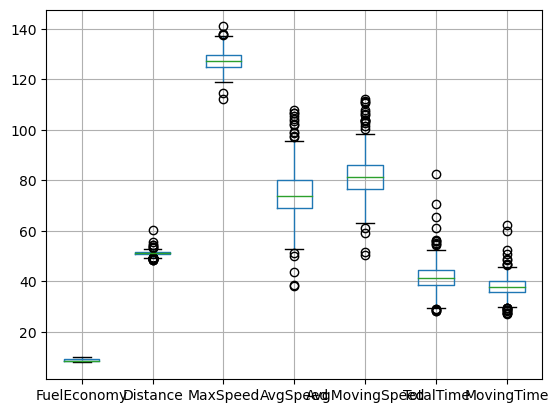

In [40]:
df.boxplot(['FuelEconomy', 'Distance', 'MaxSpeed', 'AvgSpeed', 'AvgMovingSpeed', 'TotalTime', 'MovingTime'])

In [40]:
new_df = df[['Distance', 'MaxSpeed', 'AvgSpeed', 'AvgMovingSpeed', 'TotalTime', 'MovingTime']]
new_df

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime
0,51.29,127.4,78.3,84.8,39.3,36.3
1,51.63,130.3,81.8,88.9,37.9,34.9
2,51.27,127.4,82.0,85.8,37.5,35.9
3,49.17,132.3,74.2,82.9,39.8,35.6
4,51.15,136.2,83.4,88.1,36.8,34.8
...,...,...,...,...,...,...
200,54.52,125.6,49.9,82.4,65.5,39.7
201,50.90,123.7,76.2,95.1,40.1,32.1
202,51.96,132.6,57.5,76.7,54.2,40.6
203,53.28,125.8,61.6,87.6,51.9,36.5


### Determine outliers using IQR

In [41]:
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((new_df < (Q1 - 1.5 * IQR)) | (new_df > (Q3 + 1.5 * IQR)))
outliers

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,True,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
200,True,False,True,False,True,False
201,False,False,False,False,False,False
202,False,False,False,False,True,False
203,True,False,False,False,False,False


In [42]:
df_no_outliers = new_df[~((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 204
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Distance        138 non-null    float64
 1   MaxSpeed        138 non-null    float64
 2   AvgSpeed        138 non-null    float64
 3   AvgMovingSpeed  138 non-null    float64
 4   TotalTime       138 non-null    float64
 5   MovingTime      138 non-null    float64
dtypes: float64(6)
memory usage: 7.5 KB


In [43]:
new_df = df.drop(['Distance', 'MaxSpeed', 'AvgSpeed', 'AvgMovingSpeed', 'TotalTime', 'MovingTime'], axis=1)
new_df

,Date,DayOfWeek,GoingTo,FuelEconomy,Take407All,Comments
0,1.325868e+09,Friday,Home,8.9698,0,NaN
1,1.325838e+09,Friday,GSK,8.9923,0,NaN
2,1.325694e+09,Wednesday,Home,8.9797,0,NaN
3,1.325664e+09,Wednesday,GSK,8.9938,0,NaN
4,1.325617e+09,Tuesday,Home,8.9731,0,NaN
...,...,...,...,...,...,...
200,1.310977e+09,Monday,GSK,7.8900,0,NaN
201,1.310631e+09,Thursday,GSK,7.8900,1,NaN
202,1.310577e+09,Wednesday,Home,8.1662,1,NaN
203,1.310493e+09,Tuesday,Home,8.1558,1,NaN


In [44]:
new_df = pd.concat([new_df, df_no_outliers], axis=1)
new_df

,Date,DayOfWeek,GoingTo,FuelEconomy,Take407All,Comments,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime
0,1.325868e+09,Friday,Home,8.9698,0,NaN,51.29,127.4,78.3,84.8,39.3,36.3
1,1.325838e+09,Friday,GSK,8.9923,0,NaN,51.63,130.3,81.8,88.9,37.9,34.9
2,1.325694e+09,Wednesday,Home,8.9797,0,NaN,51.27,127.4,82.0,85.8,37.5,35.9
3,1.325664e+09,Wednesday,GSK,8.9938,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.325617e+09,Tuesday,Home,8.9731,0,NaN,51.15,136.2,83.4,88.1,36.8,34.8
...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.310977e+09,Monday,GSK,7.8900,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,1.310631e+09,Thursday,GSK,7.8900,1,NaN,50.90,123.7,76.2,95.1,40.1,32.1
202,1.310577e+09,Wednesday,Home,8.1662,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,1.310493e+09,Tuesday,Home,8.1558,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Date            205 non-null    float64 
 1   DayOfWeek       205 non-null    category
 2   GoingTo         205 non-null    category
 3   FuelEconomy     205 non-null    float64 
 4   Take407All      205 non-null    int64   
 5   Comments        24 non-null     category
 6   Distance        138 non-null    float64 
 7   MaxSpeed        138 non-null    float64 
 8   AvgSpeed        138 non-null    float64 
 9   AvgMovingSpeed  138 non-null    float64 
 10  TotalTime       138 non-null    float64 
 11  MovingTime      138 non-null    float64 
dtypes: category(3), float64(8), int64(1)
memory usage: 16.2 KB


# Graphical visualization of features

Here we visualize the features using the seaborn pairplot method. We can see which columns correlate with each other.

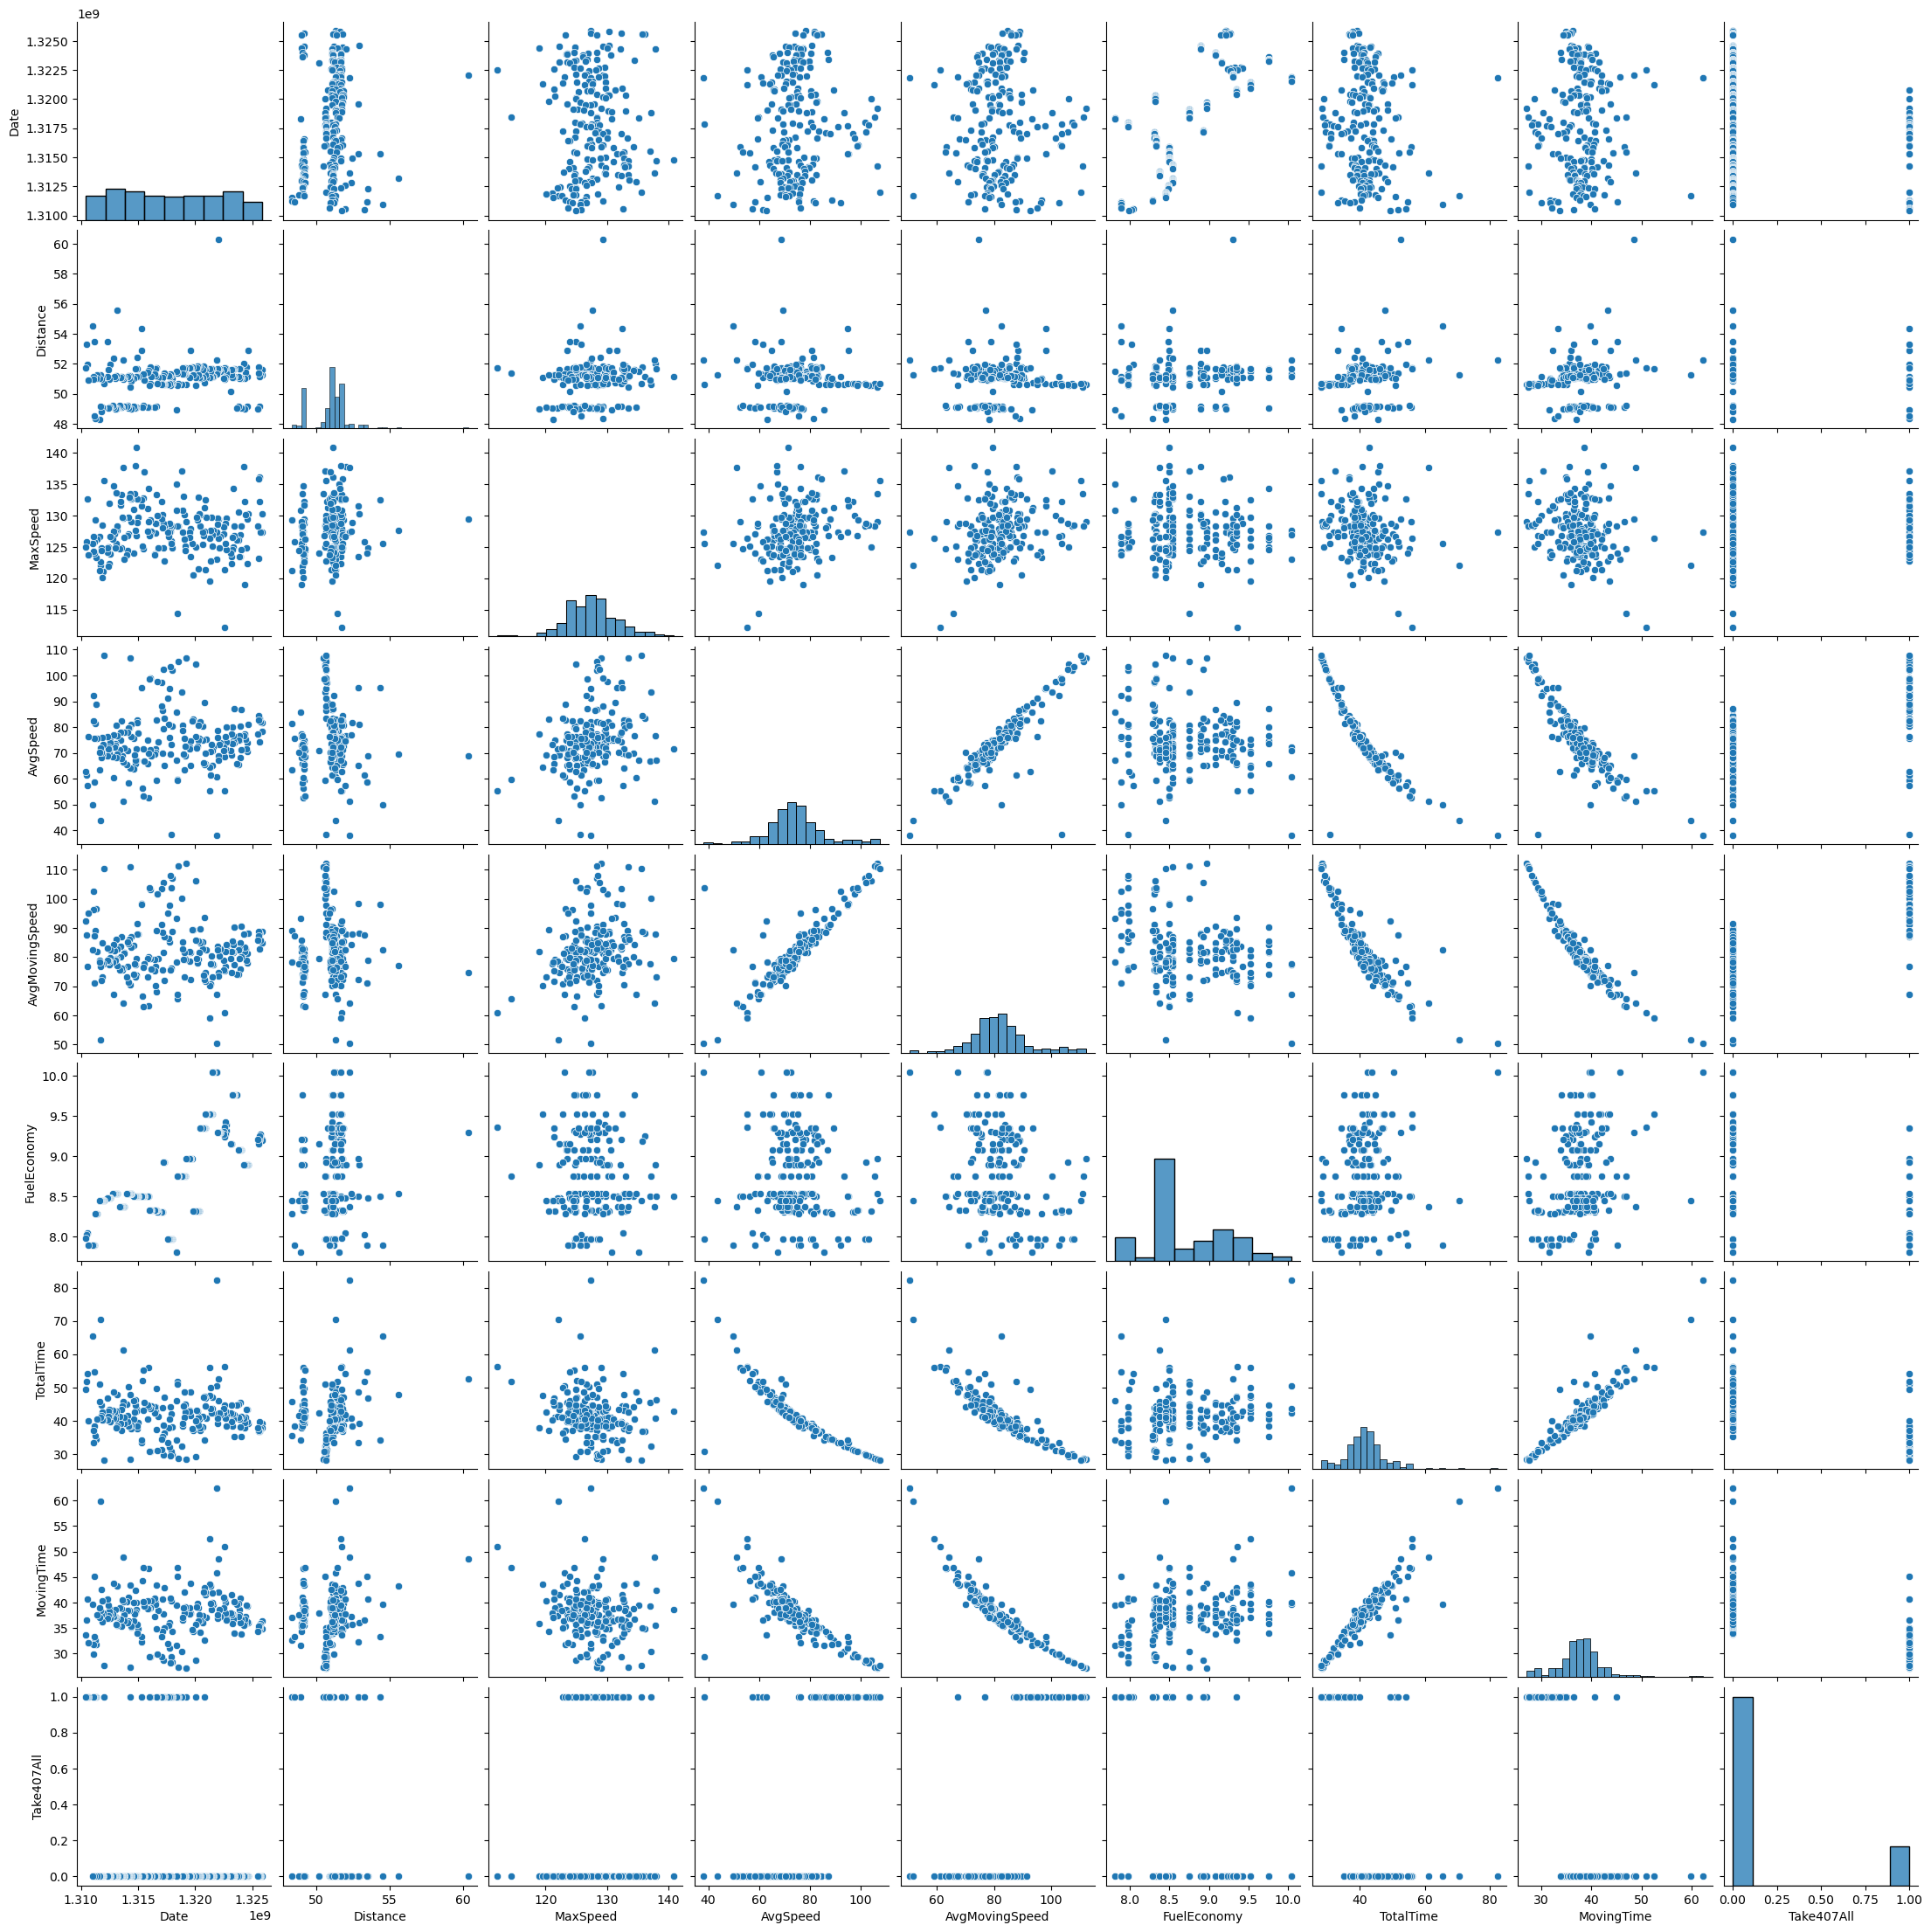

In [40]:
import seaborn as sns
sns.pairplot(df)

# Examine the relationships within the dataset - using 2 different methods
We want to examine the relationship between our features and the target variable 'FuelEconomy'. First we look the heatmap graph of the dataset correlations. Then, we look at how speed and distance influence our target variable using a scatterplot graph.

In [63]:
corr = df.corr()
corr

/tmp/ipykernel_5528/2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Date,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All
Date,1.000000,0.181932,-0.024178,0.078953,-0.025033,0.722411,-0.081904,0.043741,-0.228822
Distance,0.181932,1.000000,0.145091,-0.006445,0.011874,0.160707,0.197207,0.197044,-0.041145
MaxSpeed,-0.024178,0.145091,1.000000,0.253869,0.257823,-0.089412,-0.198775,-0.222574,0.115181
AvgSpeed,0.078953,-0.006445,0.253869,1.000000,0.872143,-0.103905,-0.877806,-0.835814,0.532695
AvgMovingSpeed,-0.025033,0.011874,0.257823,0.872143,1.000000,-0.245227,-0.856986,-0.944433,0.682920
FuelEconomy,0.722411,0.160707,-0.089412,-0.103905,-0.245227,1.000000,0.143548,0.268474,-0.368146
TotalTime,-0.081904,0.197207,-0.198775,-0.877806,-0.856986,0.143548,1.000000,0.920935,-0.453187
MovingTime,0.043741,0.197044,-0.222574,-0.835814,-0.944433,0.268474,0.920935,1.000000,-0.573339
Take407All,-0.228822,-0.041145,0.115181,0.532695,0.682920,-0.368146,-0.453187,-0.573339,1.000000


<Axes: >

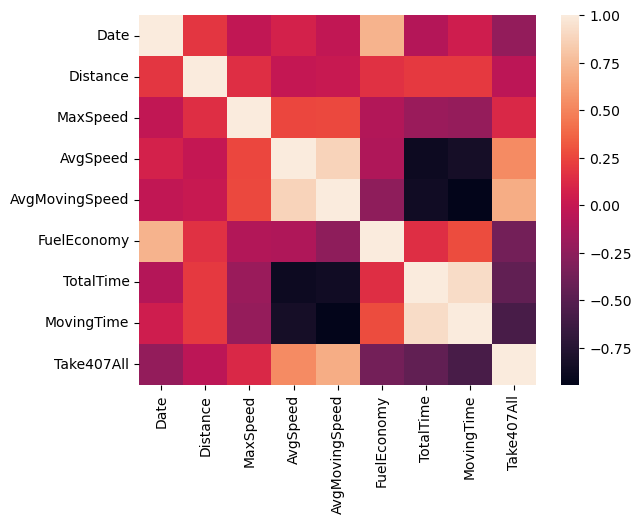

In [42]:
sns.heatmap(corr)

<Axes: xlabel='FuelEconomy', ylabel='AvgSpeed'>

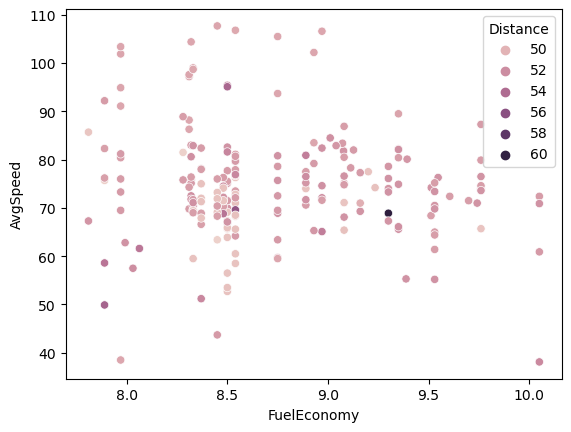

In [39]:
import seaborn as sns

sns.scatterplot(data=df,x='FuelEconomy', y='AvgSpeed',hue='Distance')

# Reduction of the dimensionality of the dataset

Finally, we can double check our correlation graphs by analyzing the feature importance using a random forest regressor.

In [65]:
mask = corr.columns != "FuelEconomy"
corr = corr.loc[:, mask]
X = df[corr.columns[1:]]
X

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime,Take407All
0,51.29,127.4,78.3,84.8,39.3,36.3,0
1,51.63,130.3,81.8,88.9,37.9,34.9,0
2,51.27,127.4,82.0,85.8,37.5,35.9,0
3,49.17,132.3,74.2,82.9,39.8,35.6,0
4,51.15,136.2,83.4,88.1,36.8,34.8,0
...,...,...,...,...,...,...,...
200,54.52,125.6,49.9,82.4,65.5,39.7,0
201,50.90,123.7,76.2,95.1,40.1,32.1,1
202,51.96,132.6,57.5,76.7,54.2,40.6,1
203,53.28,125.8,61.6,87.6,51.9,36.5,1


In [66]:
y = df['FuelEconomy'].values
y

array([ 9.3046,  9.3294,  9.3183,  9.3601,  9.1991,  9.2084,  9.2621,
        9.3328,  8.89  ,  8.89  ,  8.89  ,  8.89  ,  8.89  ,  8.89  ,
        8.89  ,  8.89  ,  9.08  ,  9.08  ,  9.08  ,  9.08  ,  9.08  ,
        9.08  ,  9.08  ,  9.08  ,  9.76  ,  9.76  ,  9.76  ,  9.76  ,
        9.76  ,  9.76  ,  9.76  ,  9.16  ,  9.16  ,  9.16  ,  9.4537,
        9.4952,  9.3307,  9.3745,  9.2421,  9.4325,  9.3521,  9.343 ,
        9.3   ,  9.3   ,  9.3   ,  9.3   ,  9.3   ,  9.3   , 10.05  ,
       10.05  , 10.05  , 10.05  ,  9.53  ,  9.53  ,  9.53  ,  9.53  ,
        9.53  ,  9.53  ,  9.53  ,  9.53  ,  9.35  ,  9.35  ,  9.35  ,
        9.35  ,  9.35  ,  9.35  ,  9.35  ,  9.35  ,  8.32  ,  8.32  ,
        8.32  ,  8.32  ,  8.32  ,  8.32  ,  8.32  ,  8.32  ,  8.97  ,
        8.97  ,  8.97  ,  8.97  ,  8.97  ,  8.97  ,  8.75  ,  8.75  ,
        8.75  ,  8.75  ,  8.75  ,  8.75  ,  8.75  ,  8.75  ,  8.75  ,
        8.75  ,  8.75  ,  7.81  ,  7.81  ,  7.97  ,  7.97  ,  7.97  ,
        7.97  ,  7.9

In [67]:
model = RandomForestRegressor()

In [68]:
model.fit(X,y)

RandomForestRegressor()

In [69]:
importance_list = list(zip(X.columns, model.feature_importances_))
sorted_importance = sorted(importance_list, key=lambda x: x[1], reverse=True)
sorted_importance
# importance = model.feature_importances_
# X.columns

[('Distance', 0.2652006819091692),
 ('MaxSpeed', 0.16832613012157677),
 ('MovingTime', 0.1310295912775566),
 ('AvgMovingSpeed', 0.12295019231562829),
 ('AvgSpeed', 0.1194268380169451),
 ('Take407All', 0.10172745847134335),
 ('TotalTime', 0.09133910788778073)]

In [70]:
max_feature_len = len(max(X.columns, key=len))

In [71]:
for feature, rank in sorted_importance:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank*100:.2f}%')

Distance: ...... 26.52%
MaxSpeed: ...... 16.83%
MovingTime: .... 13.10%
AvgMovingSpeed:  12.30%
AvgSpeed: ...... 11.94%
Take407All: .... 10.17%
TotalTime: ..... 9.13%


# Insights and Findings

Our dataset has 13 columns. Categorical variables are the columns 'GoingTo', 'DayOfWeek', 'Date', 'Take407All', and 'Comments', and every column is nominal excepts the ordinal 'Date' column. Numerical variables are the columns 'StartTime', 'Distance', 'MaxSpeed', 'AvgSpeed', FuelEconomy', 'TotalTime', and 'MovingTime', and these columns are all continuous variables.

Our dataset contains 205 entries and the 'FuelEconomy' contains 17 missing values, We used Random forest regression to predict our missing values, and the lowest accuracy of our model was 77% and the highest 95%.

We found that the every numerical column except FuelEconomy has outliers, and the previous columns without the outliers have 138 entries.

Using pairplot graphs, we can see which columns correlate with each other. We can see that average speeds and time columns are inversely correlated. It makes complete sense that time increases when speed decreases, and time decreases when speed increases.

We found some interesting insights using heatmap and scatter plot graphs. From the heatmap, we can see that average speed and average moving speed are inversely correlated with totaltime and moving time, and the fuel economy is correlated with movingtime by 27% and distance by 16%. 

We assumed that speed and distance are correlated with fuel economy, but looking at the scatteplot correlation graph, we can see that there's no correlation. However, our analysis of the feature importance using a random forest regressor show that fuel economy is correlated with Distance by 26.52%, MaxSpeed by 16.83%, and MovingTime by 13.10%. This suggests that scatter plot is not a reliable method to show relationship between variables. 